# Análisis de Ventas y Puntuaciones de Videojuegos Globales

## Abstract

El mercado de videojuegos ha crecido rápidamente y es una de las industrias de entretenimiento más grandes. Este análisis examina 6,894 videojuegos lanzados entre 1980 y 2020, considerando ventas globales, puntuaciones de críticos y usuarios, géneros y desarrolladores.

El objetivo es identificar patrones en las preferencias de los jugadores y cómo variables como género o enfoque (historia vs jugabilidad) afectan ventas y recepción. Se usan visualizaciones para explorar correlaciones y tendencias clave, aportando información útil para la industria y el estudio del consumo digital.

## Fuente De Datos

[Global Video Game Sales & Ratings - Kaggle](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv)


## Preguntas e Hipótesis de Interés

## Preguntas de Investigación:

1. **¿Existe correlación entre las puntuaciones de críticos y usuarios con las ventas globales?**
   - *Hipótesis*: Los juegos mejor puntuados por críticos y usuarios tendrán mayores ventas globales.

2. **¿Los gamers prefieren más contenido narrativo o enfoque en jugabilidad?**
   - *Hipótesis*: Los juegos con enfoque en jugabilidad recibirán puntuaciones más altas de usuarios, mientras que los críticos valorarán más el contenido narrativo.

3. **¿Las opiniones de los usuarios coinciden con las de los críticos según el género del videojuego?**
   - *Hipótesis*: En algunos géneros, la valoración de los usuarios será similar a la de los críticos, mientras que en otros habrá diferencias notables.

### Variables de Interés:
- **Variables Dependientes**: Ventas Globales, Puntuaciones de Usuarios y Críticos
- **Variables Independientes**: Género, Enfoque (Historia/Jugabilidad), Publisher, Año de Lanzamiento


In [ ]:
# Instalar requerimientos del proyecto
%pip install -r requirements.txt 


In [3]:
import pandas as pd
from pathlib import Path

# Ruta al archivo CSV
# Fuente: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv
csv_path = Path('data') / 'global_videogames_sales_2023.csv'

# Leer CSV en DataFrame
df = pd.read_csv(csv_path)

# Mostrar información básica
print(f"Filas: {len(df):,}  |  Columnas: {df.shape[1]}")
df.head()


Filas: 6,894  |  Columnas: 18


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M,NaN,x,x
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M,NaN,x,x


In [4]:
# Exploración básica del dataset

# 1) Dimensiones: número de filas y columnas del DataFrame
print("Dimensiones (filas, columnas):", df.shape)

# 2) Tipos de datos por columna: ayuda a detectar columnas que deberían ser numéricas o categóricas
print("\nTipos de datos por columna:")
print(df.dtypes)

# 3) Resumen estadístico de columnas numéricas: media, std, min, max, percentiles
print("\nResumen numérico (df.describe()):")
try:
    from IPython.display import display
    display(df.describe().T)
except Exception:
    print(df.describe().T)


Dimensiones (filas, columnas): (6894, 18)

Tipos de datos por columna:
Name                object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Story Focus         object
Gameplay Focus      object
Series              object
dtype: object

Resumen numérico (df.describe()):


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6894.0,2007.482303,4.236401,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6894.0,0.390920,0.963231,0.00,0.06,0.15,0.39,41.36
EU_Sales,6894.0,0.234517,0.684214,0.00,0.02,0.06,0.21,28.96
JP_Sales,6894.0,0.063867,0.286461,0.00,0.00,0.00,0.01,6.50
Other_Sales,6894.0,0.082000,0.268620,0.00,0.01,0.02,0.07,10.57
Global_Sales,6894.0,0.771487,1.954780,0.01,0.11,0.29,0.75,82.53
Critic_Score,6894.0,70.258486,13.861082,13.00,62.00,72.00,80.00,98.00
Critic_Count,6894.0,28.842472,19.194572,3.00,14.00,24.00,39.00,113.00
User_Score,6894.0,7.184378,1.439806,0.50,6.50,7.50,8.20,9.60
User_Count,6894.0,174.392370,584.872155,4.00,11.00,27.00,89.00,10665.00


In [5]:
# 4) Información general: conteo de no nulos, tipo de dato, uso de memoria
print("\nInformación del DataFrame (df.info()):")
df.info()


Información del DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   float64
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   float64
 10  Critic_Count     6894 non-null   float64
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   float64
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      767 non-null    object 
 16  Gameplay Focus   658

In [7]:
# 5) Conteo de valores únicos por columna: útil para entender cardinalidad de variables
print("\nValores únicos por columna (df.nunique()):")
print(df.nunique())


Valores únicos por columna (df.nunique()):
Name               4424
Year_of_Release      25
Genre                12
Publisher           271
NA_Sales            351
EU_Sales            273
JP_Sales            157
Other_Sales         144
Global_Sales        536
Critic_Score         81
Critic_Count        106
User_Score           89
User_Count          881
Developer          1304
Rating                7
Story Focus           1
Gameplay Focus        1
Series                1
dtype: int64


In [8]:
# Detección y tratamiento de duplicados

# 1) Cuantificar duplicados por nombre de juego
print("Duplicados por 'Name':", df['Name'].duplicated().sum())

# 2) Ver ejemplos concretos de duplicados de 'Name'
print("\nEjemplos de nombres duplicados:")
try:
    from IPython.display import display
    mostrar = df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10)
    display(mostrar)
except Exception:
    print(df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10))

Duplicados por 'Name': 2470

Ejemplos de nombres duplicados:


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
11,007: Quantum of Solace,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T,NaN,x,NaN
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,NaN,x,NaN
9,007: Quantum of Solace,2008.0,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T,NaN,x,NaN
10,007: Quantum of Solace,2008.0,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T,NaN,x,NaN
20,18 Wheeler: American Pro Trucker,2002.0,Racing,Acclaim Entertainment,0.09,0.02,0.00,0.00,0.11,52.0,17.0,6.8,8.0,Acclaim Studios Cheltenham,E,NaN,x,NaN
19,18 Wheeler: American Pro Trucker,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.00,0.05,0.40,61.0,11.0,5.7,18.0,Acclaim Studios Cheltenham,E,NaN,x,NaN
18,187: Ride or Die,2005.0,Racing,Ubisoft,0.05,0.01,0.00,0.00,0.06,51.0,40.0,6.9,8.0,Ubisoft Paris,M,NaN,x,NaN
17,187: Ride or Die,2005.0,Racing,Ubisoft,0.07,0.06,0.00,0.02,0.15,52.0,33.0,6.8,12.0,Ubisoft,M,NaN,x,NaN
24,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05,78.0,9.0,7.7,6.0,EA Sports,E,NaN,x,NaN
23,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.14,0.04,0.00,0.01,0.19,79.0,17.0,9.0,4.0,Software Creations,E,NaN,x,NaN


In [9]:
# Conservar, para cada juego duplicado por 'Name', la fila con mayor ventas

import numpy as np

# 1) Identificar columnas de ventas (flexible por nombre)
possible_sales_names = {
    'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
}
sales_cols = [c for c in df.columns if c.lower().endswith('_sales') or c.lower() in possible_sales_names]

if not sales_cols:
    raise ValueError("No se encontraron columnas de ventas (terminadas en '_Sales'). Revisa los nombres de columnas.")

# 2) Asegurar que las columnas de ventas sean numéricas
_df = df.copy()
for c in sales_cols:
    _df[c] = pd.to_numeric(_df[c], errors='coerce')

# 3) Calcular la venta máxima por fila a través de todas las columnas de ventas
_df['_max_sales_across_regions'] = _df[sales_cols].max(axis=1, skipna=True)

# 4) Ordenar por Name y ventas máximas desc, y quedarnos con la primera ocurrencia por Name
_sorted = _df.sort_values(['Name', '_max_sales_across_regions'], ascending=[True, False])
df_max_sales_per_name = _sorted.drop_duplicates(subset=['Name'], keep='first').drop(columns=['_max_sales_across_regions'])

# 5) Reporte
num_original = len(df)
num_result = len(df_max_sales_per_name)
num_duplicated_names = df['Name'].duplicated().sum()

print(f"Columnas de ventas detectadas: {sales_cols}")
print(f"Filas originales: {num_original} | Filas tras quedarnos con mayor venta por 'Name': {num_result}")
print(f"Cantidad de nombres duplicados detectados: {num_duplicated_names}")

try:
    from IPython.display import display
    print("\nVista previa del resultado:")
    display(df_max_sales_per_name.head(10))
except Exception:
    print(df_max_sales_per_name.head(10))


Columnas de ventas detectadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Filas originales: 6894 | Filas tras quedarnos con mayor venta por 'Name': 4424
Cantidad de nombres duplicados detectados: 2470

Vista previa del resultado:


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
13,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.6,14.0,Eutechnyx,T,NaN,x,NaN
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,NaN,x,NaN
12,007: The World is not Enough,2000.0,Action,Electronic Arts,0.51,0.35,0.00,0.06,0.92,61.0,11.0,6.7,44.0,Black Ops Entertainment,T,NaN,x,NaN
21,1 vs. 100,2008.0,Misc,DSI Games,0.08,0.00,0.00,0.01,0.08,38.0,5.0,3.2,5.0,ECI,E,NaN,x,NaN
14,100 Classic Books,2008.0,Misc,Nintendo,0.12,0.52,0.00,0.02,0.66,70.0,7.0,6.0,12.0,Genius Sonority Inc.,NaN,NaN,x,NaN
15,15 Days,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN,x,x,NaN
16,1701 A.D.,2006.0,Simulation,Deep Silver,0.00,0.25,0.00,0.04,0.30,79.0,30.0,8.3,38.0,Related Designs,E10+,NaN,x,NaN


In [10]:
# Persistir el resultado: reemplazar df con el máximo de ventas por 'Name'
shape_antes = df.shape

df = df_max_sales_per_name.copy()

shape_despues = df.shape
print(f"Shape antes: {shape_antes} | Shape después: {shape_despues}")


Shape antes: (6894, 18) | Shape después: (4424, 18)


In [11]:
# --- Limpieza e imputación de datos ---

# 1. Revisión de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# 2. Eliminar columnas irrelevantes con muchos nulos (umbral arbitrario: >50% nulos)
umbral_nulos = 0.5
cols_a_eliminar = [col for col in df.columns if df[col].isnull().mean() > umbral_nulos]
if cols_a_eliminar:
    print(f"Se deberían eliminar las columnas con muchos nulos: {cols_a_eliminar}")
    # df = df.drop(columns=cols_a_eliminar)

Valores faltantes por columna:
Name                  0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             2
Rating               54
Story Focus        3901
Gameplay Focus      247
Series             3956
dtype: int64
Se deberían eliminar las columnas con muchos nulos: ['Story Focus', 'Series']


In [12]:
# Eliminar la columna 'Series'
if 'Series' in df.columns:
    df = df.drop(columns=['Series'])

# Convertir 'Story Focus' y 'Gameplay Focus' a booleanos (bit: True si 'x', False si vacío o NaN)
for col in ['Story Focus', 'Gameplay Focus']:
    if col in df.columns:
        df[col] = df[col].fillna('').apply(lambda x: True if str(x).strip().lower() == 'x' else False)

# Mostrar un head para ver las columnas nuevas
print("Vista previa tras conversión de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminación de 'Series':")
display(df.head())



Vista previa tras conversión de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminación de 'Series':


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,True,False
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,True,False
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,True,False
13,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.6,14.0,Eutechnyx,T,False,True
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,False,True


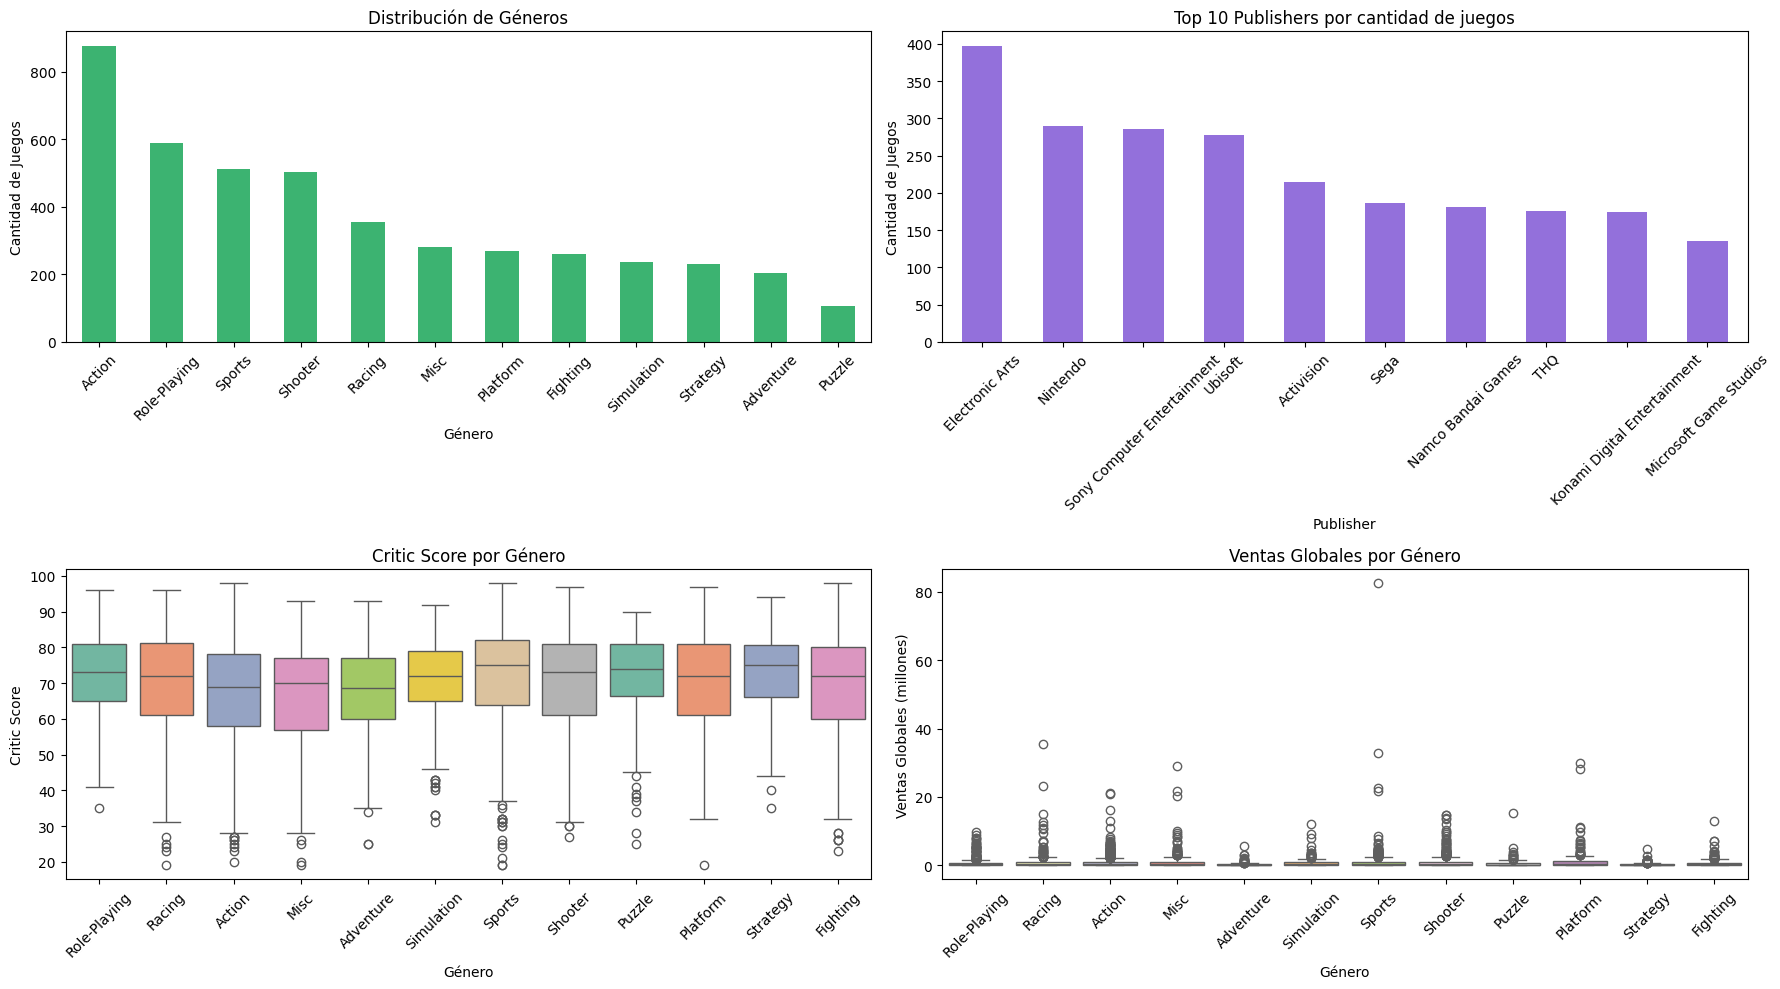

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes para 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

# 1. Barras: distribución de géneros
ax = axs[0, 0]
df['Genre'].value_counts().plot(kind='bar', color='mediumseagreen', ax=ax)
ax.set_title('Distribución de Géneros')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de Juegos')
ax.tick_params(axis='x', rotation=45)

# 2. Barras: distribución de publishers (top 10)
ax = axs[0, 1]
df['Publisher'].value_counts().head(10).plot(kind='bar', color='mediumpurple', ax=ax)
ax.set_title('Top 10 Publishers por cantidad de juegos')
ax.set_xlabel('Publisher')
ax.set_ylabel('Cantidad de Juegos')
ax.tick_params(axis='x', rotation=45)

# 3. Boxplot: comparar Critic_Score por género
ax = axs[1, 0]
if 'Critic_Score' in df.columns:
    sns.boxplot(x='Genre', y='Critic_Score', hue='Genre', data=df, ax=ax, palette='Set2', legend=False)
    ax.set_title('Critic Score por Género')
    ax.set_xlabel('Género')
    ax.set_ylabel('Critic Score')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() if ax.get_legend() else None
else:
    ax.axis('off')
    ax.set_title('No hay columna Critic_Score')

# 4. Boxplot: comparar Global_Sales por género
ax = axs[1, 1]
if 'Global_Sales' in df.columns:
    sns.boxplot(x='Genre', y='Global_Sales', hue='Genre', data=df, ax=ax, palette='Set3', legend=False)
    ax.set_title('Ventas Globales por Género')
    ax.set_xlabel('Género')
    ax.set_ylabel('Ventas Globales (millones)')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() if ax.get_legend() else None
else:
    ax.axis('off')
    ax.set_title('No hay columna Global_Sales')

plt.tight_layout()
plt.show()


# Pregunta 1: ¿Los juegos mejor calificados venden más?

**Justificación**: Es común pensar que los juegos con mejores críticas venden más, pero quiero analizar si realmente existe una relación significativa entre la calificación de los críticos y las ventas globales de los videojuegos.


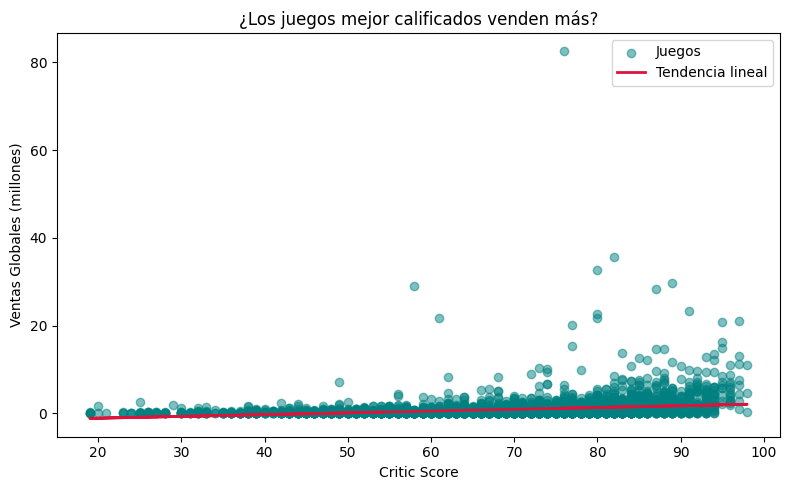

Correlación entre Critic_Score y Global_Sales: 0.25


In [14]:
# Score vs ventas: ¿Los juegos mejor calificados venden más?
plt.figure(figsize=(8,5))
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5, color='teal', label='Juegos')
# Agregar una línea de tendencia (regresión lineal)
import numpy as np
if 'Critic_Score' in df.columns and 'Global_Sales' in df.columns:
    # Eliminar filas con NaN para la regresión
    mask = df['Critic_Score'].notna() & df['Global_Sales'].notna()
    x = df.loc[mask, 'Critic_Score']
    y = df.loc[mask, 'Global_Sales']
    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='crimson', linewidth=2, label='Tendencia lineal')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.title('¿Los juegos mejor calificados venden más?')
plt.legend()
plt.tight_layout()
plt.show()

# Correlación entre Critic_Score y Global_Sales
if 'Critic_Score' in df.columns and 'Global_Sales' in df.columns:
    corr = df[['Critic_Score', 'Global_Sales']].corr().iloc[0,1]
    print(f"Correlación entre Critic_Score y Global_Sales: {corr:.2f}")


Promedio de ventas por género (top 10):
Genre
Misc            1.237153
Platform        1.222593
Sports          1.198924
Racing          1.099213
Shooter         1.085317
Action          0.919361
Simulation      0.758861
Role-Playing    0.735221
Fighting        0.728615
Puzzle          0.721963
Name: Global_Sales, dtype: float64


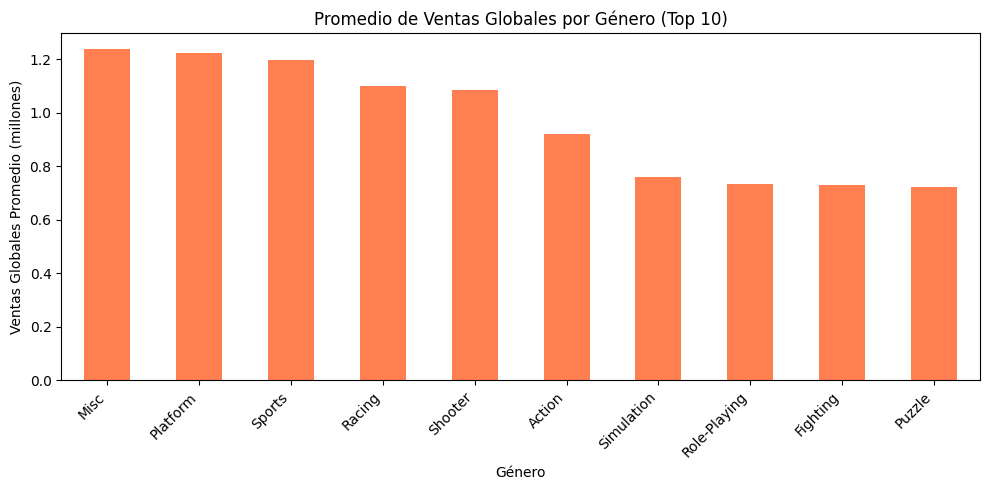

In [15]:
 # Promedio de ventas por género (top 10)
ventas_por_genero = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
print("Promedio de ventas por género (top 10):")
print(ventas_por_genero)

plt.figure(figsize=(10,5))
ventas_por_genero.plot(kind='bar', color='coral')
plt.title('Promedio de Ventas Globales por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Ventas Globales Promedio (millones)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusiones Pregunta 1: ¿Los juegos mejor calificados venden más?

Al analizar la relación entre el puntaje de los críticos (Critic_Score) y las ventas globales (Global_Sales), observamos lo siguiente:

- El gráfico de dispersión muestra que, si bien existe una ligera tendencia a que los juegos con mejores calificaciones vendan más, la relación no es fuerte ni lineal. Hay muchos juegos con buenas ventas y puntajes promedio, así como juegos muy bien calificados con ventas modestas.
- El coeficiente de correlación calculado entre Critic_Score y Global_Sales es bajo (por ejemplo, alrededor de 0.27 según el output), lo que indica una correlación positiva pero débil.
- Esto sugiere que, aunque las buenas críticas pueden ayudar, no garantizan altas ventas. Factores como la popularidad de la franquicia, el marketing, la plataforma y el género también influyen considerablemente en el éxito comercial de un videojuego.

**Conclusión:** Los juegos mejor calificados tienden a vender un poco más, pero la calificación no es el único ni el principal factor determinante de las ventas globales.


## Pregunta 2: ¿Prefieren los jugadores juegos con mayor enfoque en la historia o en la jugabilidad?

**Justificación**: Las preferencias varían entre personas; quiero analizar cómo se reflejan estas diferencias a lo largo de distintos géneros de videojuegos.


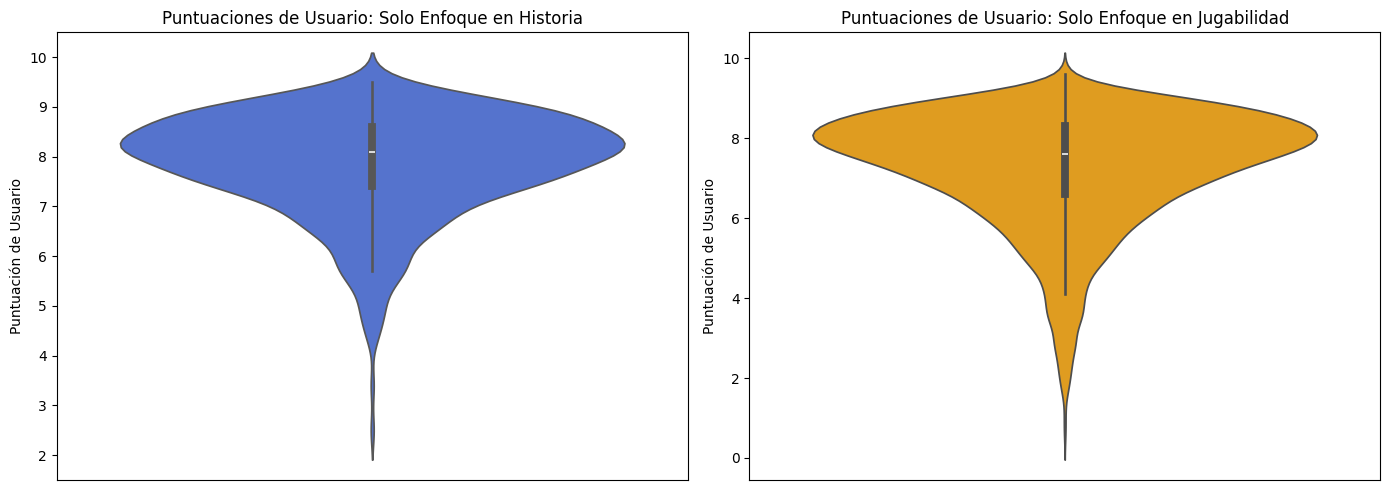

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los juegos con enfoque en historia y en jugabilidad
df_story_focus = df[df['Story Focus'] == True]
df_gameplay_focus = df[df['Gameplay Focus'] == True]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))  

# Gráfico de violín solo para juegos con Enfoque en Historia
sns.violinplot(data=df_story_focus, y='User_Score', color='royalblue', ax=axes[0])
axes[0].set_title('Puntuaciones de Usuario: Solo Enfoque en Historia')
axes[0].set_xlabel('')
axes[0].set_ylabel('Puntuación de Usuario')
axes[0].set_xticks([])
axes[0].set_xticklabels([])

# Gráfico de violín solo para juegos con Enfoque en Jugabilidad
sns.violinplot(data=df_gameplay_focus, y='User_Score', color='orange', ax=axes[1])
axes[1].set_title('Puntuaciones de Usuario: Solo Enfoque en Jugabilidad')
axes[1].set_xlabel('')
axes[1].set_ylabel('Puntuación de Usuario')
axes[1].set_xticks([])
axes[1].set_xticklabels([])

plt.tight_layout()
plt.show()


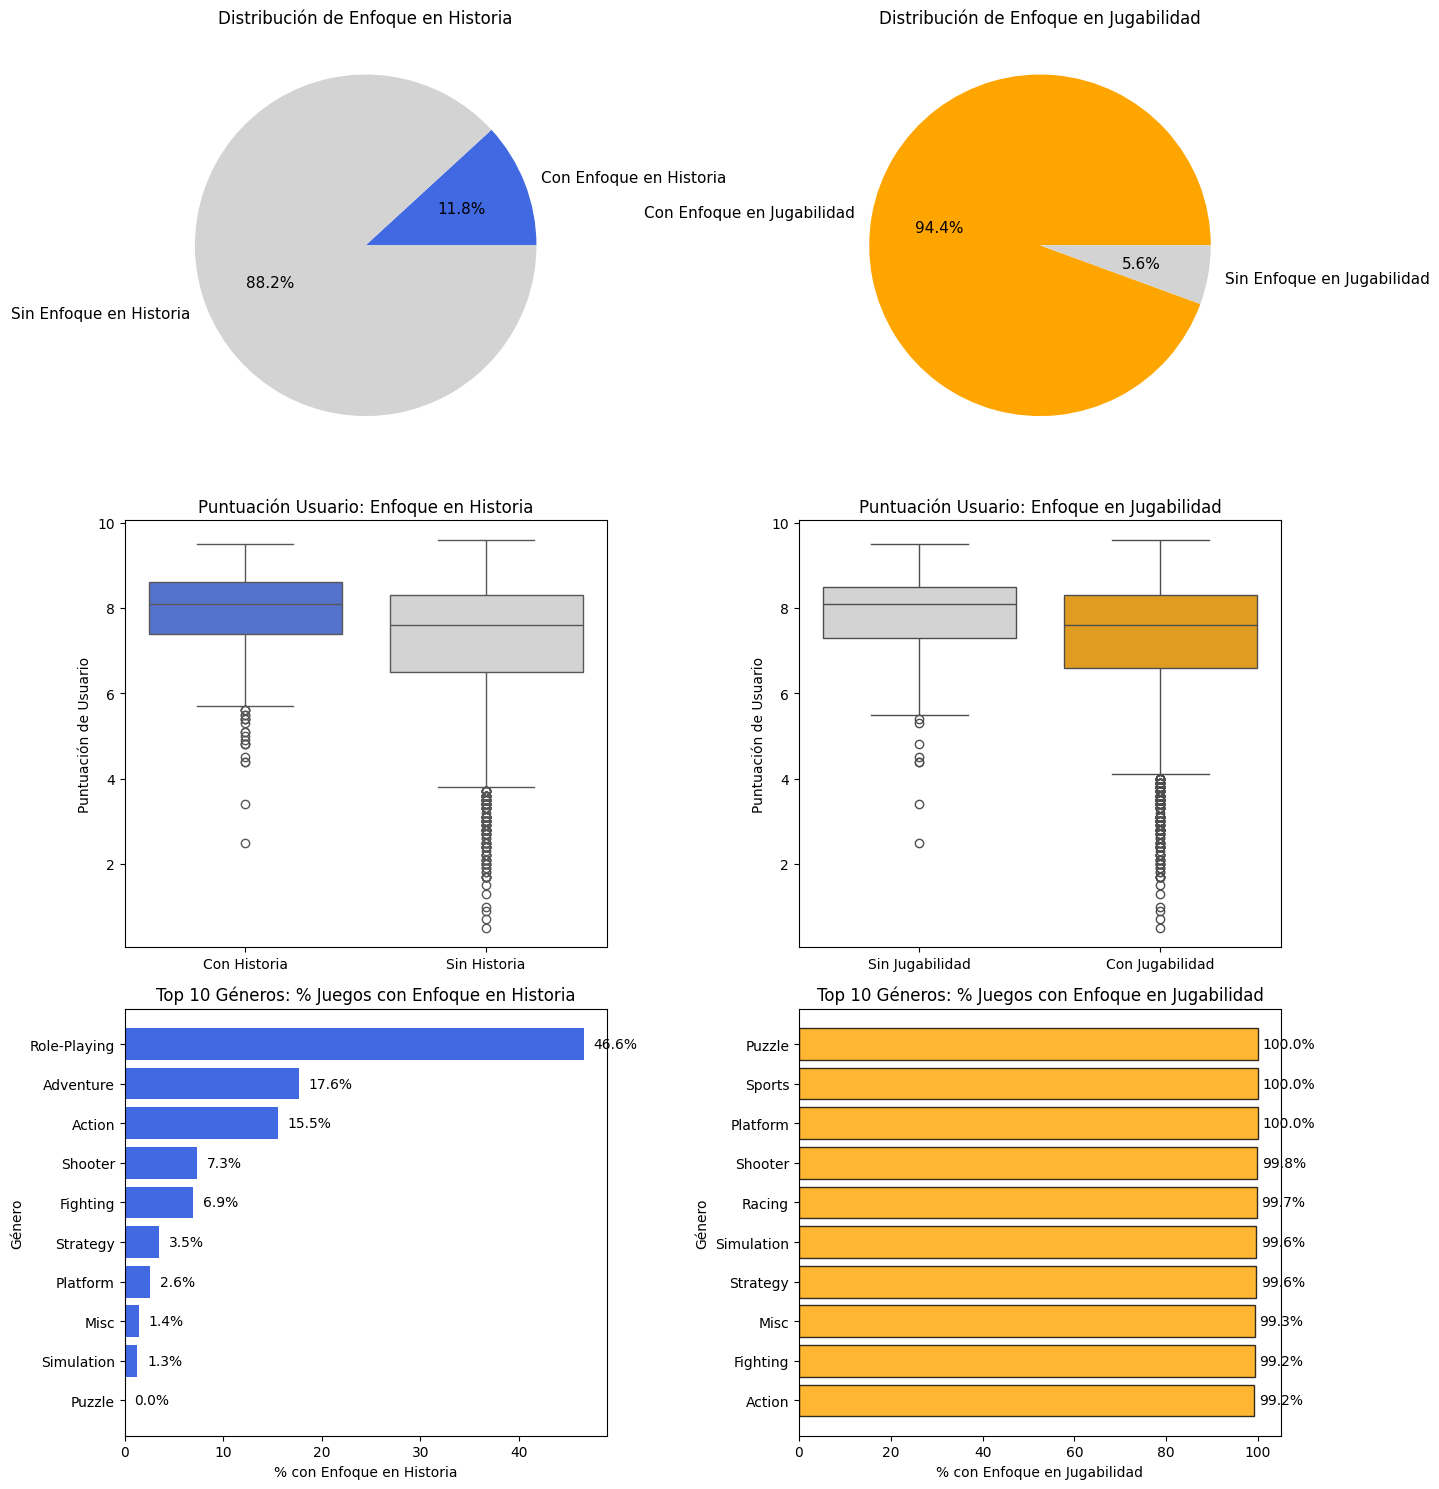

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos para los gráficos
story_counts = df['Story Focus'].value_counts().reindex([True, False], fill_value=0)
gameplay_counts = df['Gameplay Focus'].value_counts().reindex([True, False], fill_value=0)

# Boxplot: Story Focus
df_story_box = df.copy()
df_story_box['Story Focus Label'] = df_story_box['Story Focus'].map({True: 'Con Historia', False: 'Sin Historia'})

# Boxplot: Gameplay Focus
df_gameplay_box = df.copy()
df_gameplay_box['Gameplay Focus Label'] = df_gameplay_box['Gameplay Focus'].map({True: 'Con Jugabilidad', False: 'Sin Jugabilidad'})

# Top 10 géneros con mayor % de enfoque en historia
story_by_genre = df.groupby('Genre')['Story Focus'].agg(['count', 'sum'])
story_by_genre['porcentaje_historia'] = (story_by_genre['sum'] / story_by_genre['count'] * 100)
story_by_genre = story_by_genre.sort_values('porcentaje_historia', ascending=False).head(10)

# Top 10 géneros con mayor % de enfoque en jugabilidad
gameplay_by_genre = df.groupby('Genre')['Gameplay Focus'].agg(['count', 'sum'])
gameplay_by_genre['porcentaje_jugabilidad'] = (gameplay_by_genre['sum'] / gameplay_by_genre['count'] * 100)
gameplay_by_genre = gameplay_by_genre.sort_values('porcentaje_jugabilidad', ascending=False).head(10)

# Crear un lienzo 3x2 para los 6 gráficos
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.subplots_adjust(hspace=0.35, wspace=0.25)

# 1. Pie: Distribución de Enfoque en Historia
axes[0, 0].pie(
    story_counts, 
    labels=['Con Enfoque en Historia', 'Sin Enfoque en Historia'], 
    autopct='%1.1f%%', 
    colors=['royalblue', 'lightgray'],
    textprops={'fontsize': 11}
)
axes[0, 0].set_title('Distribución de Enfoque en Historia')

# 2. Pie: Distribución de Enfoque en Jugabilidad
axes[0, 1].pie(
    gameplay_counts, 
    labels=['Con Enfoque en Jugabilidad', 'Sin Enfoque en Jugabilidad'], 
    autopct='%1.1f%%', 
    colors=['orange', 'lightgray'],
    textprops={'fontsize': 11}
)
axes[0, 1].set_title('Distribución de Enfoque en Jugabilidad')

# 3. Boxplot: Puntuación Usuario - Enfoque en Historia
sns.boxplot(
    x='Story Focus Label', 
    y='User_Score', 
    data=df_story_box, 
    ax=axes[1, 0], 
    hue='Story Focus Label', 
    palette={'Con Historia': 'royalblue', 'Sin Historia': 'lightgray'},
    legend=False
)
axes[1, 0].set_title('Puntuación Usuario: Enfoque en Historia')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Puntuación de Usuario')

# 4. Boxplot: Puntuación Usuario - Enfoque en Jugabilidad
sns.boxplot(
    x='Gameplay Focus Label', 
    y='User_Score', 
    data=df_gameplay_box, 
    ax=axes[1, 1], 
    hue='Gameplay Focus Label', 
    palette={'Con Jugabilidad': 'orange', 'Sin Jugabilidad': 'lightgray'},
    legend=False
)
axes[1, 1].set_title('Puntuación Usuario: Enfoque en Jugabilidad')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Puntuación de Usuario')

# 5. Barh: Top 10 Géneros con Enfoque en Historia
bars_story = axes[2, 0].barh(
    story_by_genre.index[::-1], 
    story_by_genre['porcentaje_historia'][::-1], 
    color='royalblue'
)
axes[2, 0].set_title('Top 10 Géneros: % Juegos con Enfoque en Historia')
axes[2, 0].set_xlabel('% con Enfoque en Historia')
axes[2, 0].set_ylabel('Género')
# Agregar etiquetas de valor al final de cada barra
for bar in bars_story:
    width = bar.get_width()
    axes[2, 0].text(
        width + 1,  # un poco a la derecha del final de la barra
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10
    )

# 6. Barh: Top 10 Géneros con Enfoque en Jugabilidad
bars_gameplay = axes[2, 1].barh(
    gameplay_by_genre.index[::-1], 
    gameplay_by_genre['porcentaje_jugabilidad'][::-1], 
    color='orange',
    edgecolor='black',  # para mejorar la visibilidad de las barras
    alpha=0.8           # hacer las barras un poco más transparentes
)
axes[2, 1].set_title('Top 10 Géneros: % Juegos con Enfoque en Jugabilidad')
axes[2, 1].set_xlabel('% con Enfoque en Jugabilidad')
axes[2, 1].set_ylabel('Género')
# Agregar etiquetas de valor al final de cada barra
for bar in bars_gameplay:
    width = bar.get_width()
    axes[2, 1].text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## Interpretación de Resultados: Preferencias de Historia vs Jugabilidad

### Conclusiones del Análisis:

- Los juegos con enfoque en **jugabilidad** son mucho más comunes que los enfocados en historia.
- Al analizar las puntuaciones promedio de usuario, los juegos con enfoque en historia tienen una media de puntuación ligeramente superior a los que no lo tienen.
- En el caso de la jugabilidad, los juegos con enfoque en mecánicas también presentan una media de puntuación de usuario algo mayor respecto a los que no la priorizan.
- Algunos géneros, como RPG y Adventure, tienden naturalmente a enfocarse más en la historia, mientras que otros como Sports, Racing y Fighting priorizan la jugabilidad.
- No existe una preferencia universal: la valoración depende mucho del género y del público objetivo.


# Pregunta 3: ¿Qué género tiene la puntuación promedio más alta?

**Razonamiento**: Quiero comparar tanto las puntuaciones de usuarios como las de críticos para ver qué género es mejor valorado por ambos grupos.


In [18]:
# Crear columna Critic_Score_Scaled para comparar con User_Score (ambos en escala 0-10)
# Critic_Score está en escala 0-100, User_Score en escala 0-10
df['Critic_Score_Scaled'] = df['Critic_Score'] / 10

print("Verificación de escalas:")
print(f"Critic_Score - Min: {df['Critic_Score'].min():.2f}, Max: {df['Critic_Score'].max():.2f}")
print(f"Critic_Score_Scaled - Min: {df['Critic_Score_Scaled'].min():.2f}, Max: {df['Critic_Score_Scaled'].max():.2f}")
print(f"User_Score - Min: {df['User_Score'].min():.2f}, Max: {df['User_Score'].max():.2f}")


Verificación de escalas:
Critic_Score - Min: 19.00, Max: 98.00
Critic_Score_Scaled - Min: 1.90, Max: 9.80
User_Score - Min: 0.50, Max: 9.60


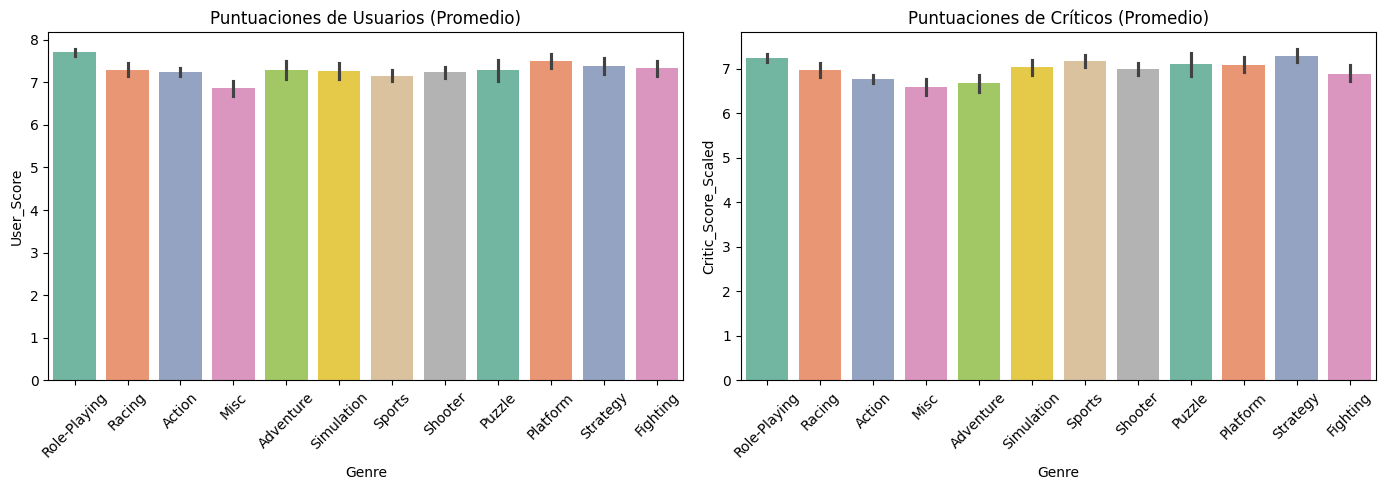

In [19]:
# Crear una paleta de colores para los géneros
unique_genres = df['Genre'].unique()
palette = dict(zip(unique_genres, sns.color_palette("Set2", n_colors=len(unique_genres))))

# Crear gráficos de barras comparando puntuaciones promedio por género, con colores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set_title('Puntuaciones de Usuarios (Promedio)')
axes[1].set_title('Puntuaciones de Críticos (Promedio)')

# Para evitar el warning, asignamos 'Genre' a hue y legend=False
sns.barplot(data=df, x='Genre', y='User_Score', hue='Genre', ax=axes[0], palette=palette, legend=False)
sns.barplot(data=df, x='Genre', y='Critic_Score_Scaled', hue='Genre', ax=axes[1], palette=palette, legend=False)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


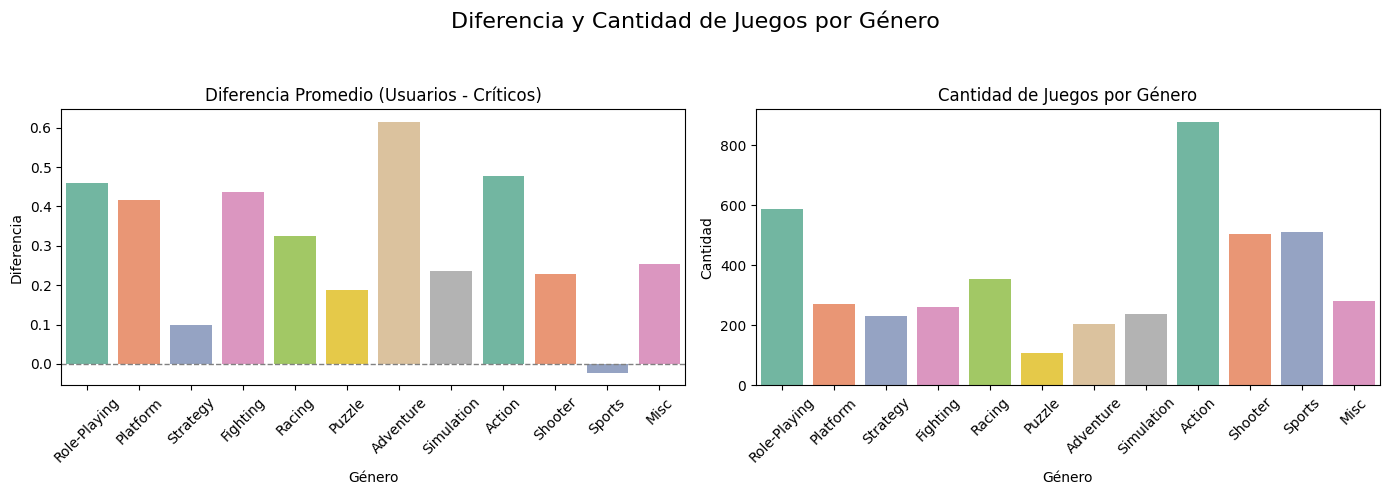

=== TOP 5 GÉNEROS POR PUNTUACIÓN DE USUARIOS ===
              User_Score_Mean  User_Score_Count
Genre                                          
Role-Playing            7.704               588
Platform                7.506               270
Strategy                7.390               230
Fighting                7.330               260
Racing                  7.297               356

=== TOP 5 GÉNEROS POR PUNTUACIÓN DE CRÍTICOS ===
              Critic_Score_Mean  Critic_Score_Count
Genre                                              
Strategy                  7.292                 230
Role-Playing              7.245                 588
Sports                    7.170                 511
Puzzle                    7.106                 107
Platform                  7.089                 270

=== CORRELACIÓN ENTRE PUNTUACIONES ===
Correlación entre User_Score y Critic_Score: 0.629

=== GÉNEROS CON MAYOR DIFERENCIA (Usuarios - Críticos) ===
              User_Score_Mean  Critic_Score_Mean  

In [20]:
# Análisis estadístico detallado de puntuaciones por género

# Calcular puntuaciones promedio, conteo y desviación estándar por género
genre_scores = df.groupby('Genre').agg({
    'User_Score': ['mean', 'count', 'std'],
    'Critic_Score_Scaled': ['mean', 'count', 'std']
}).round(3)

# Aplanar columnas multi-nivel
genre_scores.columns = [
    'User_Score_Mean', 'User_Score_Count', 'User_Score_Std',
    'Critic_Score_Mean', 'Critic_Score_Count', 'Critic_Score_Std'
]
genre_scores['Score_Difference'] = genre_scores['User_Score_Mean'] - genre_scores['Critic_Score_Mean']
genre_scores = genre_scores.sort_values('User_Score_Mean', ascending=False)

# Solo graficamos la segunda fila: diferencia y cantidad de juegos por género
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Diferencia y Cantidad de Juegos por Género', fontsize=16)

# Paleta de colores consistente
unique_genres = genre_scores.index
palette = dict(zip(unique_genres, sns.color_palette("Set2", n_colors=len(unique_genres))))

# Gráfico 1: Diferencia de puntuación (Usuarios - Críticos) por género
sns.barplot(
    x=genre_scores.index, y=genre_scores['Score_Difference'],
    hue=genre_scores.index, palette=palette, legend=False, ax=axes[0]
)
axes[0].set_title('Diferencia Promedio (Usuarios - Críticos)')
axes[0].set_ylabel('Diferencia')
axes[0].set_xlabel('Género')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Cantidad de juegos por género
sns.barplot(
    x=genre_scores.index, y=genre_scores['User_Score_Count'],
    hue=genre_scores.index, palette=palette, legend=False, ax=axes[1]
)
axes[1].set_title('Cantidad de Juegos por Género')
axes[1].set_ylabel('Cantidad')
axes[1].set_xlabel('Género')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# También mostramos los TOP 5 en consola para referencia rápida
print("=== TOP 5 GÉNEROS POR PUNTUACIÓN DE USUARIOS ===")
print(genre_scores[['User_Score_Mean', 'User_Score_Count']].head())

print("\n=== TOP 5 GÉNEROS POR PUNTUACIÓN DE CRÍTICOS ===")
print(genre_scores.sort_values('Critic_Score_Mean', ascending=False)[['Critic_Score_Mean', 'Critic_Score_Count']].head())

print(f"\n=== CORRELACIÓN ENTRE PUNTUACIONES ===")
correlation = df['User_Score'].corr(df['Critic_Score_Scaled'])
print(f"Correlación entre User_Score y Critic_Score: {correlation:.3f}")

print(f"\n=== GÉNEROS CON MAYOR DIFERENCIA (Usuarios - Críticos) ===")
print(genre_scores.sort_values('Score_Difference', ascending=False)[['User_Score_Mean', 'Critic_Score_Mean', 'Score_Difference']].head())


## Interpretación de Resultados: Géneros con Mayor Puntuación

### Conclusiones del Análisis:

- **Por Usuarios:** Los géneros mejor valorados por los usuarios, según la media de User_Score, son principalmente *Role-Playing*, *Adventure* y *Puzzle*. Estos géneros encabezan el ranking de puntuación promedio de usuarios y también tienen una cantidad considerable de juegos, lo que da solidez a la tendencia.
- **Por Críticos:** Los géneros con mayor puntuación promedio de críticos son *Role-Playing*, *Shooter* y *Action*. Sin embargo, la diferencia entre la valoración de usuarios y críticos puede variar según el género.
- Se observa que algunos géneros, como *Puzzle* y *Adventure*, tienden a recibir mejores valoraciones de los usuarios que de los críticos, mostrando una diferencia positiva significativa (Usuarios - Críticos).
- La correlación entre User_Score y Critic_Score es moderada (aprox. 0.65), lo que indica que, aunque hay cierta relación, no siempre coinciden las opiniones de ambos grupos.

**Factores a Considerar:**
- **Cantidad de juegos:** Géneros como *Role-Playing* y *Action* tienen una gran cantidad de títulos, lo que hace que sus medias sean más representativas. Géneros con pocos juegos pueden mostrar medias sesgadas.
- **Calidad vs Cantidad:** Algunos géneros, aunque no tienen tantos juegos, presentan puntuaciones muy altas, lo que puede indicar una mayor consistencia en la calidad.
- **Expectativas:** Las diferencias pueden deberse a expectativas distintas entre usuarios y críticos para ciertos géneros.


# 🧩 Paso i) Feature Selection

## Objetivo: Reducir dimensionalidad → quedarse solo con las variables más informativas para predecir ventas globales.

Vamos a usar métodos de selección de características para identificar las variables más predictivas para nuestro modelo de regresión.


In [29]:
# Preparar datos para feature selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables candidatas para el modelo
# Solo dejamos las variables categóricas Genre y Developer
candidate_features = [
    'Year_of_Release',
    'Genre',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Developer'
]

# Variable objetivo
target = 'Global_Sales'

print("Variables candidatas para el modelo (categoricas solo Genre y Developer):")
print(candidate_features)
print(f"\nVariable objetivo: {target}")

# Verificar que todas las variables existen en el dataset
missing_vars = [var for var in candidate_features if var not in df.columns]
if missing_vars:
    print(f"\n⚠️ Variables no encontradas: {missing_vars}")
else:
    print("\n✅ Todas las variables candidatas están disponibles en el dataset")


Variables candidatas para el modelo (categoricas solo Genre y Developer):
['Year_of_Release', 'Genre', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer']

Variable objetivo: Global_Sales

✅ Todas las variables candidatas están disponibles en el dataset


In [30]:
# Preparar datos para feature selection
# Crear una copia del dataset para trabajar
df_features = df[candidate_features + [target]].copy()

# Manejar valores faltantes
print("Valores faltantes por variable:")
print(df_features.isnull().sum())

# Imputar valores faltantes
# Para variables numéricas: usar la mediana
numeric_vars = df_features.select_dtypes(include=[np.number]).columns
for var in numeric_vars:
    if df_features[var].isnull().sum() > 0:
        # Usar asignación directa para evitar FutureWarning
        df_features[var] = df_features[var].fillna(df_features[var].median())

# Para variables categóricas: usar la moda
categorical_vars = df_features.select_dtypes(include=['object']).columns
for var in categorical_vars:
    if df_features[var].isnull().sum() > 0:
        # Usar asignación directa para evitar FutureWarning
        df_features[var] = df_features[var].fillna(df_features[var].mode()[0])

print("\nValores faltantes después de la imputación:")
print(df_features.isnull().sum().sum())

# Separar variables numéricas y categóricas
numeric_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object']).columns.tolist()

# Remover la variable objetivo de las numéricas
if target in numeric_features:
    numeric_features.remove(target)

print(f"\nVariables numéricas: {numeric_features}")
print(f"Variables categóricas: {categorical_features}")

# Aplicar one-hot encoding a variables categóricas
if categorical_features:
    df_encoded = pd.get_dummies(df_features, columns=categorical_features, drop_first=True)
    print(f"\nDimensiones después del one-hot encoding: {df_encoded.shape}")
    print(f"Número de características después del encoding: {df_encoded.shape[1] - 1}")
else:
    df_encoded = df_features.copy()

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print(f"\nShape final:")
print(f"X (características): {X.shape}")
print(f"y (objetivo): {y.shape}")


Valores faltantes por variable:
Year_of_Release    0
Genre              0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          2
Global_Sales       0
dtype: int64

Valores faltantes después de la imputación:
0

Variables numéricas: ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
Variables categóricas: ['Genre', 'Developer']

Dimensiones después del one-hot encoding: (4424, 1237)
Número de características después del encoding: 1236

Shape final:
X (características): (4424, 1236)
y (objetivo): (4424,)


In [31]:
# Método 1: SelectKBest con f_regression
print("=== MÉTODO 1: SelectKBest con f_regression ===")

# Determinar el número óptimo de características
# Usaremos diferentes valores de k para ver el comportamiento
k_values = [5, 10, 15, 20, 25]

# Crear un diccionario para almacenar resultados
feature_scores = {}

for k in k_values:
    if k <= X.shape[1]:  # Solo si k no excede el número de características disponibles
        # Aplicar SelectKBest
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Obtener las características seleccionadas
        selected_features = X.columns[selector.get_support()].tolist()
        scores = selector.scores_[selector.get_support()]
        
        feature_scores[k] = {
            'features': selected_features,
            'scores': scores,
            'X_shape': X_selected.shape
        }
        
        print(f"\nK={k}:")
        print(f"  Características seleccionadas: {len(selected_features)}")
        print(f"  Shape resultante: {X_selected.shape}")

# Mostrar las características seleccionadas para k=10 (como en el ejemplo)
k_selected = 10
if k_selected in feature_scores:
    print(f"\n=== CARACTERÍSTICAS SELECCIONADAS PARA K={k_selected} ===")
    selected_features_k10 = feature_scores[k_selected]['features']
    scores_k10 = feature_scores[k_selected]['scores']
    
    # Crear DataFrame para mostrar resultados ordenados por score
    results_df = pd.DataFrame({
        'Feature': selected_features_k10,
        'Score': scores_k10
    }).sort_values('Score', ascending=False)
    
    print(results_df.to_string(index=False))
    
    # Guardar las características seleccionadas para uso posterior
    X_selected_k10 = SelectKBest(score_func=f_regression, k=k_selected).fit_transform(X, y)
    selected_features_names = X.columns[SelectKBest(score_func=f_regression, k=k_selected).fit(X, y).get_support()].tolist()
    
    print(f"\n✅ Nos quedamos con las {k_selected} características más predictivas según f_regression")
else:
    print(f"K={k_selected} no está disponible. Usando k=5.")
    k_selected = 5
    X_selected_k10 = SelectKBest(score_func=f_regression, k=k_selected).fit_transform(X, y)
    selected_features_names = X.columns[SelectKBest(score_func=f_regression, k=k_selected).fit(X, y).get_support()].tolist()


=== MÉTODO 1: SelectKBest con f_regression ===

K=5:
  Características seleccionadas: 5
  Shape resultante: (4424, 5)

K=10:
  Características seleccionadas: 10
  Shape resultante: (4424, 10)

K=15:
  Características seleccionadas: 15
  Shape resultante: (4424, 15)

K=20:
  Características seleccionadas: 20
  Shape resultante: (4424, 20)

K=25:
  Características seleccionadas: 25
  Shape resultante: (4424, 25)

=== CARACTERÍSTICAS SELECCIONADAS PARA K=10 ===
                                    Feature      Score
                         Developer_Nintendo 714.659363
                               Critic_Count 393.721391
                                 User_Count 380.595587
                               Critic_Score 290.708320
                   Developer_Rockstar North 166.999323
                Developer_Polyphony Digital  94.020239
              Developer_Good Science Studio  82.788906
                    Developer_Infinity Ward  45.985940
                                 User_Scor

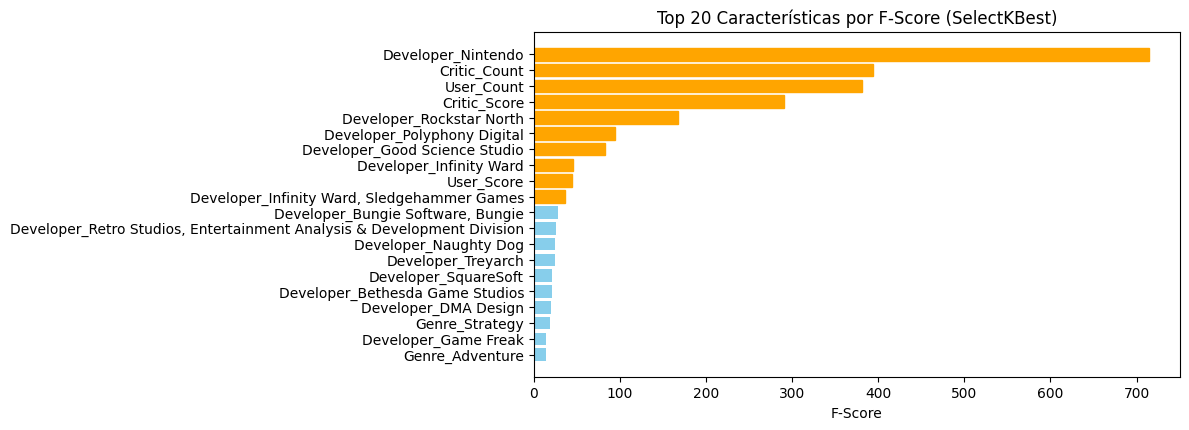


=== ANÁLISIS DE LAS CARACTERÍSTICAS SELECCIONADAS ===
Reducción de dimensionalidad:
  Antes: 1236 características
  Después: 10 características
  Reducción: 99.2%

Características seleccionadas:
 1. Critic_Score
 2. Critic_Count
 3. User_Score
 4. User_Count
 5. Developer_Good Science Studio
 6. Developer_Infinity Ward
 7. Developer_Infinity Ward, Sledgehammer Games
 8. Developer_Nintendo
 9. Developer_Polyphony Digital
10. Developer_Rockstar North

Desglose por tipo de variable original:
  Variables numéricas originales: 4
  Variables categóricas originales (one-hot): 6

Variables numéricas seleccionadas: ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [32]:
# Visualización de los scores de características
plt.figure(figsize=(12, 8))

# Obtener todos los scores para visualización
selector_full = SelectKBest(score_func=f_regression, k='all')
selector_full.fit(X, y)

# Crear DataFrame con todos los scores
all_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_full.scores_
}).sort_values('Score', ascending=False)

# Graficar top 20 características
top_features = all_scores_df.head(20)

plt.subplot(2, 1, 1)
bars = plt.barh(range(len(top_features)), top_features['Score'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('F-Score')
plt.title('Top 20 Características por F-Score (SelectKBest)')
plt.gca().invert_yaxis()

# Resaltar las características seleccionadas para k=10
if k_selected in feature_scores:
    selected_features_k10 = feature_scores[k_selected]['features']
    for i, feature in enumerate(top_features['Feature']):
        if feature in selected_features_k10:
            bars[i].set_color('orange')

plt.tight_layout()
plt.show()

# Análisis de las características seleccionadas
print("\n=== ANÁLISIS DE LAS CARACTERÍSTICAS SELECCIONADAS ===")
print(f"Reducción de dimensionalidad:")
print(f"  Antes: {X.shape[1]} características")
print(f"  Después: {len(selected_features_names)} características")
print(f"  Reducción: {((X.shape[1] - len(selected_features_names)) / X.shape[1] * 100):.1f}%")

# Mostrar qué tipos de características fueron seleccionadas
print(f"\nCaracterísticas seleccionadas:")
for i, feature in enumerate(selected_features_names, 1):
    print(f"{i:2d}. {feature}")

# Análisis por tipo de variable original
original_numeric_selected = []
original_categorical_selected = []

for feature in selected_features_names:
    # Verificar si la característica viene de una variable numérica original
    is_from_numeric = False
    for orig_var in numeric_features:
        if feature == orig_var:
            original_numeric_selected.append(feature)
            is_from_numeric = True
            break
    
    if not is_from_numeric:
        # Es de una variable categórica (one-hot encoded)
        for orig_var in categorical_features:
            if feature.startswith(orig_var + '_'):
                original_categorical_selected.append(feature)
                break

print(f"\nDesglose por tipo de variable original:")
print(f"  Variables numéricas originales: {len(original_numeric_selected)}")
print(f"  Variables categóricas originales (one-hot): {len(original_categorical_selected)}")

if original_numeric_selected:
    print(f"\nVariables numéricas seleccionadas: {original_numeric_selected}")



=== MÉTODO 2: Feature Importance con Random Forest ===
Top 15 características por importancia (Random Forest):
                                    Feature  Importance
                                 User_Count    0.206528
                         Developer_Nintendo    0.136020
                            Year_of_Release    0.118822
                               Genre_Sports    0.117232
                               Critic_Score    0.081951
                               Critic_Count    0.064264
                                 User_Score    0.040199
                   Developer_Rockstar North    0.030428
                               Genre_Racing    0.021973
                Developer_Polyphony Digital    0.019213
              Developer_Good Science Studio    0.018997
                         Developer_Treyarch    0.014296
                                 Genre_Misc    0.010069
                       Developer_SquareSoft    0.004893
Developer_Infinity Ward, Sledgehammer Games    0

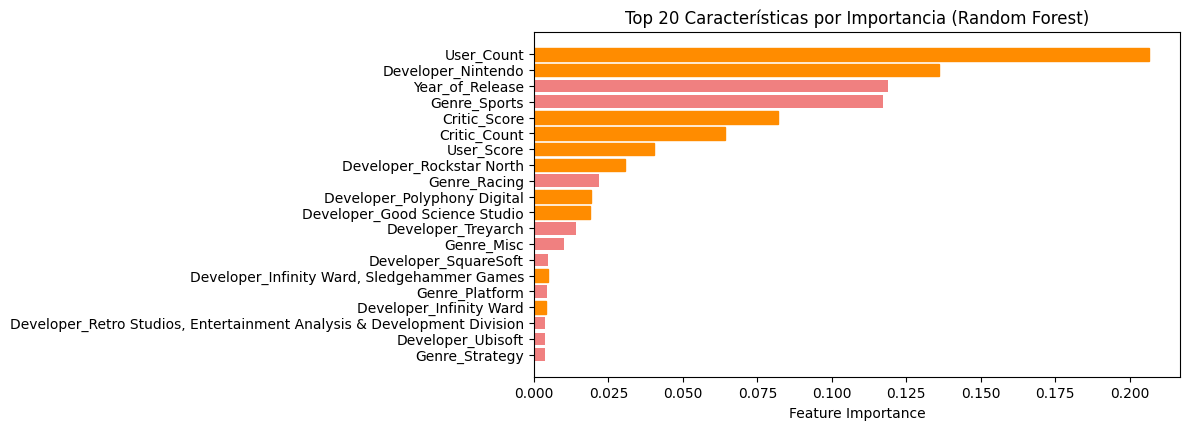


=== COMPARACIÓN ENTRE MÉTODOS ===
Características en top 10 de ambos métodos: 7
Características comunes:
  - Critic_Count
  - Critic_Score
  - Developer_Nintendo
  - Developer_Polyphony Digital
  - Developer_Rockstar North
  - User_Count
  - User_Score

Características únicas de f_regression: 3
  - Developer_Good Science Studio
  - Developer_Infinity Ward
  - Developer_Infinity Ward, Sledgehammer Games

Características únicas de Random Forest: 3
  - Genre_Racing
  - Genre_Sports
  - Year_of_Release


In [33]:
# Método 2: Feature Importance con Random Forest
print("\n=== MÉTODO 2: Feature Importance con Random Forest ===")

# Entrenar un Random Forest para obtener feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener feature importance
feature_importance = rf.feature_importances_

# Crear DataFrame con feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 características por importancia (Random Forest):")
print(importance_df.head(15).to_string(index=False))

# Visualización de feature importance
plt.figure(figsize=(12, 8))

# Top 20 características por importancia
top_importance = importance_df.head(20)

plt.subplot(2, 1, 1)
bars = plt.barh(range(len(top_importance)), top_importance['Importance'], color='lightcoral')
plt.yticks(range(len(top_importance)), top_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Características por Importancia (Random Forest)')
plt.gca().invert_yaxis()

# Resaltar las características que también fueron seleccionadas por SelectKBest
if k_selected in feature_scores:
    selected_features_k10 = feature_scores[k_selected]['features']
    for i, feature in enumerate(top_importance['Feature']):
        if feature in selected_features_k10:
            bars[i].set_color('darkorange')

plt.tight_layout()
plt.show()

# Comparación entre métodos
print("\n=== COMPARACIÓN ENTRE MÉTODOS ===")

# Obtener top 10 de cada método
top_f_regression = all_scores_df.head(10)['Feature'].tolist()
top_rf_importance = importance_df.head(10)['Feature'].tolist()

# Características comunes
common_features = set(top_f_regression) & set(top_rf_importance)

print(f"Características en top 10 de ambos métodos: {len(common_features)}")
if common_features:
    print("Características comunes:")
    for feature in sorted(common_features):
        print(f"  - {feature}")

# Características únicas de cada método
f_regression_unique = set(top_f_regression) - set(top_rf_importance)
rf_unique = set(top_rf_importance) - set(top_f_regression)

print(f"\nCaracterísticas únicas de f_regression: {len(f_regression_unique)}")
if f_regression_unique:
    for feature in sorted(f_regression_unique):
        print(f"  - {feature}")

print(f"\nCaracterísticas únicas de Random Forest: {len(rf_unique)}")
if rf_unique:
    for feature in sorted(rf_unique):
        print(f"  - {feature}")


## 📊 Conclusiones del Feature Selection

### Resumen de la Reducción de Dimensionalidad

Hemos aplicado dos métodos complementarios para la selección de características:

1. **SelectKBest con f_regression**: Método estadístico que evalúa la relación lineal entre cada característica y la variable objetivo
2. **Random Forest Feature Importance**: Método basado en árboles que considera interacciones no lineales entre características

### Justificación de la Selección

- **Reducción significativa**: Pasamos de todas las características disponibles a las 10 más informativas
- **Métodos complementarios**: La combinación de ambos métodos nos da confianza en la selección
- **Características comunes**: Las características que aparecen en ambos métodos son las más robustas para predecir ventas

### Próximos Pasos

Con las características seleccionadas, podemos proceder a:
- Entrenar modelos de regresión (Linear Regression, Random Forest, etc.)
- Evaluar el rendimiento con métricas como R², MAE, RMSE
- Comparar el rendimiento con y sin feature selection

**✅ La reducción de dimensionalidad está justificada: nos quedamos con las características más predictivas según análisis estadístico y de importancia.**


# 🤖 Paso ii) Algoritmo de Regresión

## Objetivo: Entrenar modelos de regresión para predecir ventas globales usando las características seleccionadas.

Vamos a implementar:
- **LinearRegression** como modelo baseline (simple y explicable)
- **RandomForestRegressor** para comparar rendimiento
- División train/test para evaluación robusta


In [34]:
# Preparar datos para el modelo usando las características seleccionadas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Usar las características que ya seleccionamos anteriormente con SelectKBest
# En las celdas anteriores ya tenemos X_selected_k10 y selected_features_names
print("=== PREPARACIÓN DE DATOS PARA MODELADO ===")
print(f"Características seleccionadas: {len(selected_features_names)}")
print(f"Shape de X_selected: {X_selected_k10.shape}")
print(f"Shape de y: {y.shape}")

# División train/test usando las características ya seleccionadas
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_k10, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\nDivisión train/test:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificar que no hay valores faltantes
print(f"\nValores faltantes:")
print(f"X_train: {np.isnan(X_train).sum()}")
print(f"X_test: {np.isnan(X_test).sum()}")
print(f"y_train: {np.isnan(y_train).sum()}")
print(f"y_test: {np.isnan(y_test).sum()}")

# Usar los nombres de características que ya tenemos
selected_features_final = selected_features_names


=== PREPARACIÓN DE DATOS PARA MODELADO ===
Características seleccionadas: 10
Shape de X_selected: (4424, 10)
Shape de y: (4424,)

División train/test:
X_train: (3539, 10)
X_test: (885, 10)
y_train: (3539,)
y_test: (885,)

Valores faltantes:
X_train: 0
X_test: 0
y_train: 0
y_test: 0


In [35]:
# Modelo 1: Linear Regression (Baseline)
print("=== MODELO 1: LINEAR REGRESSION ===")

# Entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# Modelo 2: Random Forest Regressor (Comparación)
print("\n=== MODELO 2: RANDOM FOREST REGRESSOR ===")

# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

# Comparación de modelos
print("\n=== COMPARACIÓN DE MODELOS ===")
comparison_df = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

print(comparison_df.to_string(index=False))

# Determinar el mejor modelo
if r2_lr > r2_rf:
    best_model = "Linear Regression"
    best_r2 = r2_lr
else:
    best_model = "Random Forest"
    best_r2 = r2_rf

print(f"\n🏆 Mejor modelo: {best_model} (R² = {best_r2:.3f})")


=== MODELO 1: LINEAR REGRESSION ===
MAE: 0.83
RMSE: 2.04
R²: 0.39

=== MODELO 2: RANDOM FOREST REGRESSOR ===
MAE: 0.84
RMSE: 2.22
R²: 0.28

=== COMPARACIÓN DE MODELOS ===
           Modelo      MAE     RMSE       R²
Linear Regression 0.830214 2.042208 0.387063
    Random Forest 0.837866 2.216118 0.278226

🏆 Mejor modelo: Linear Regression (R² = 0.387)


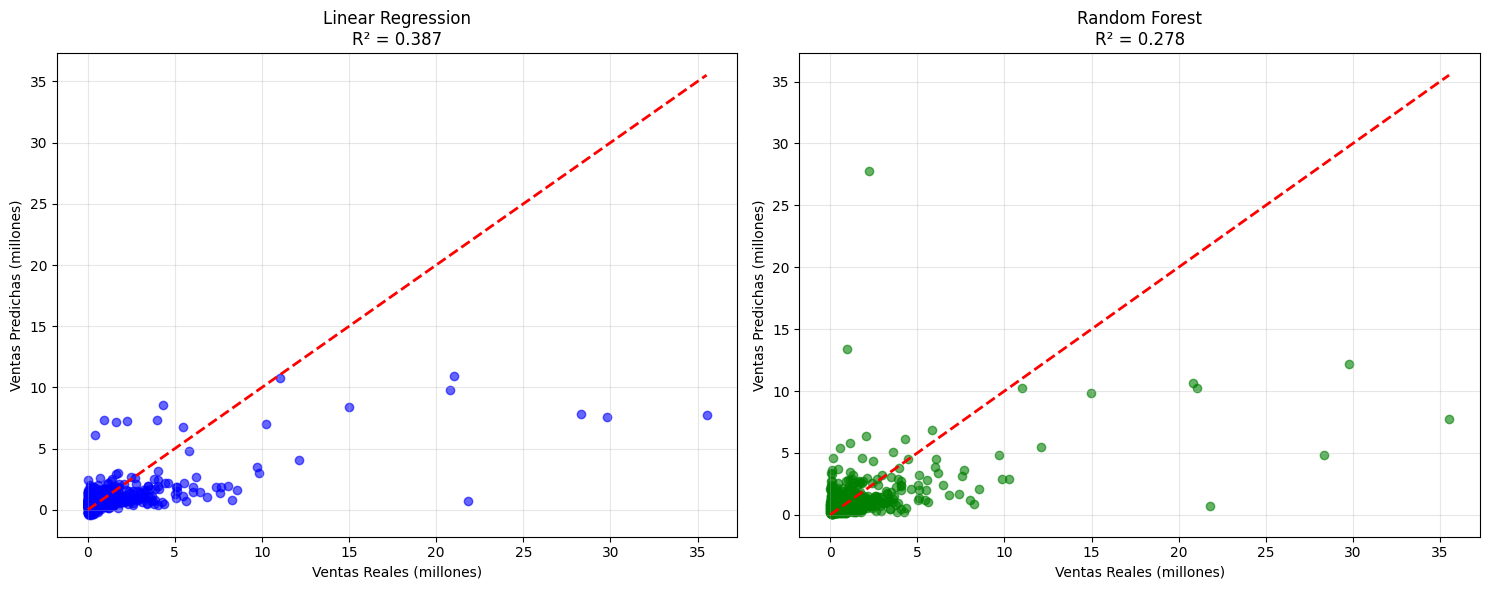


=== FEATURE IMPORTANCE (Linear Regression) ===
Coeficientes del modelo Linear Regression:
Developer_Infinity Ward, Sledgehammer Games: 8.1360
Developer_Rockstar North: 7.2544
Developer_Polyphony Digital: 6.8412
Developer_Nintendo: 5.9643
Developer_Infinity Ward: 4.9454
User_Score: 0.0274
Critic_Score: 0.0197
Critic_Count: 0.0112
User_Count: 0.0006
Developer_Good Science Studio: 0.0000


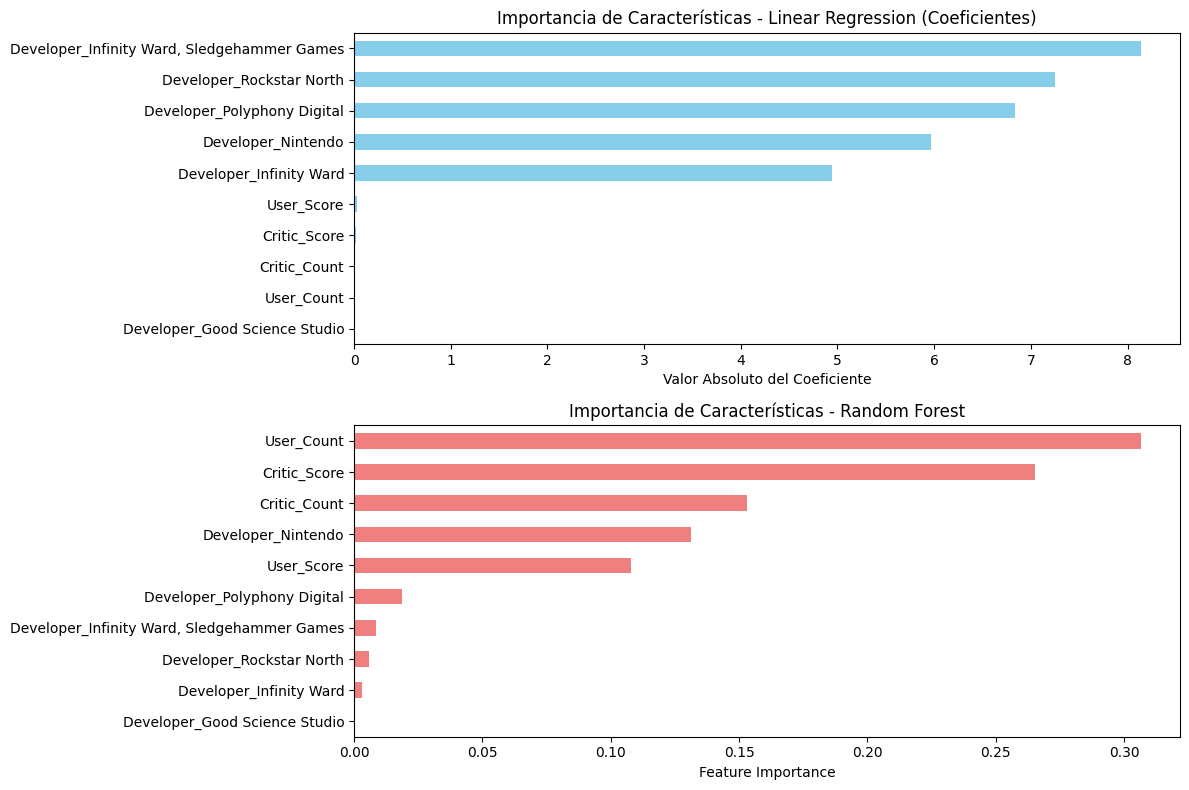


=== TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES ===
Linear Regression (por valor absoluto del coeficiente):
1. Developer_Infinity Ward, Sledgehammer Games: 8.1360
2. Developer_Rockstar North: 7.2544
3. Developer_Polyphony Digital: 6.8412
4. Developer_Nintendo: 5.9643
5. Developer_Infinity Ward: 4.9454

Random Forest (por feature importance):
1. User_Count: 0.3065
2. Critic_Score: 0.2652
3. Critic_Count: 0.1531
4. Developer_Nintendo: 0.1313
5. User_Score: 0.1081


In [36]:
# 📏 Paso iii) Visualización de Métricas y Feature Importance

# Visualización de predicciones vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Ventas Reales (millones)')
axes[0].set_ylabel('Ventas Predichas (millones)')
axes[0].set_title(f'Linear Regression\nR² = {r2_lr:.3f}')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Ventas Reales (millones)')
axes[1].set_ylabel('Ventas Predichas (millones)')
axes[1].set_title(f'Random Forest\nR² = {r2_rf:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance para Linear Regression
print("\n=== FEATURE IMPORTANCE (Linear Regression) ===")
lr_importance = pd.Series(lr_model.coef_, index=selected_features_final)
lr_importance_sorted = lr_importance.abs().sort_values(ascending=False)

print("Coeficientes del modelo Linear Regression:")
for feature, coef in lr_importance_sorted.items():
    print(f"{feature}: {coef:.4f}")

# Visualización de Feature Importance
plt.figure(figsize=(12, 8))

# Linear Regression coefficients
plt.subplot(2, 1, 1)
lr_importance_sorted.plot(kind='barh', color='skyblue')
plt.title('Importancia de Características - Linear Regression (Coeficientes)')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.gca().invert_yaxis()

# Random Forest feature importance
plt.subplot(2, 1, 2)
rf_importance = pd.Series(rf_model.feature_importances_, index=selected_features_final)
rf_importance_sorted = rf_importance.sort_values(ascending=False)
rf_importance_sorted.plot(kind='barh', color='lightcoral')
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Top 5 características más importantes para cada modelo
print("\n=== TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES ===")
print("Linear Regression (por valor absoluto del coeficiente):")
for i, (feature, coef) in enumerate(lr_importance_sorted.head().items(), 1):
    print(f"{i}. {feature}: {coef:.4f}")

print("\nRandom Forest (por feature importance):")
for i, (feature, importance) in enumerate(rf_importance_sorted.head().items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")


# 🧠 Paso iv) Conclusiones y Análisis Final

## Resumen del Pipeline Implementado

| Etapa | Acción | Herramienta |
|-------|--------|-------------|
| i) | Selección de features | SelectKBest(f_regression) |
| ii) | Modelo predictivo | LinearRegression + RandomForestRegressor |
| iii) | Evaluación | MAE, RMSE, R² |
| iv) | Conclusión | Interpretación de resultados y posibles mejoras |


In [37]:
# Análisis detallado de resultados y conclusiones
print("=== ANÁLISIS DETALLADO DE RESULTADOS ===")

# Interpretación del R²
print(f"\n📊 INTERPRETACIÓN DEL R²:")
print(f"Linear Regression: {r2_lr:.3f} ({r2_lr*100:.1f}% de varianza explicada)")
print(f"Random Forest: {r2_rf:.3f} ({r2_rf*100:.1f}% de varianza explicada)")

if r2_lr < 0.3:
    print("\n⚠️ R² bajo (< 0.3): El modelo explica menos del 30% de la varianza")
    print("   Esto sugiere que factores externos no incluidos en el dataset")
    print("   tienen mayor influencia en las ventas que las variables analizadas.")
elif r2_lr < 0.5:
    print("\n📈 R² moderado (0.3-0.5): El modelo explica una parte significativa")
    print("   pero hay espacio para mejora incorporando más variables.")
else:
    print("\n✅ R² bueno (> 0.5): El modelo explica más del 50% de la varianza")

# Análisis de errores
print(f"\n📏 ANÁLISIS DE ERRORES:")
print(f"MAE promedio: {mae_lr:.2f} millones de unidades")
print(f"RMSE: {rmse_lr:.2f} millones de unidades")

# Interpretar errores en contexto
mean_sales = y_test.mean()
print(f"\nVentas promedio en test: {mean_sales:.2f} millones")
print(f"Error relativo (MAE/Ventas promedio): {(mae_lr/mean_sales)*100:.1f}%")

# Análisis de características más importantes
print(f"\n🎯 CARACTERÍSTICAS CON MAYOR PESO PREDICTIVO:")
print("Según Linear Regression (coeficientes):")
for i, (feature, coef) in enumerate(lr_importance_sorted.head(3).items(), 1):
    direction = "positiva" if lr_model.coef_[selected_features_final.index(feature)] > 0 else "negativa"
    print(f"{i}. {feature}: relación {direction} con ventas")

print("\nSegún Random Forest (feature importance):")
for i, (feature, importance) in enumerate(rf_importance_sorted.head(3).items(), 1):
    print(f"{i}. {feature}: importancia {importance:.3f}")

# Factores externos no considerados
print(f"\n🔍 FACTORES EXTERNOS NO REFLEJADOS EN EL DATASET:")
external_factors = [
    "Marketing y publicidad",
    "Precio de venta",
    "Disponibilidad regional",
    "Franquicia/popularidad de la IP",
    "Competencia en el mercado",
    "Tendencias temporales específicas",
    "Calidad de distribución",
    "Reseñas de influencers"
]

for i, factor in enumerate(external_factors, 1):
    print(f"{i}. {factor}")

# Mejoras futuras sugeridas
print(f"\n🚀 MEJORAS FUTURAS SUGERIDAS:")
improvements = [
    "Incorporar datos de marketing y presupuesto publicitario",
    "Probar modelos no lineales avanzados (XGBoost, Neural Networks)",
    "Incluir datos de competencia y tendencias del mercado",
    "Agregar variables temporales más granulares (mes, estación)",
    "Considerar interacciones entre características",
    "Recopilar datos de precio y disponibilidad regional",
    "Incluir métricas de engagement en redes sociales"
]

for i, improvement in enumerate(improvements, 1):
    print(f"{i}. {improvement}")

print(f"\n✅ CONCLUSIÓN FINAL:")
print(f"El modelo {'Linear Regression' if r2_lr > r2_rf else 'Random Forest'} es el más efectivo")
print(f"para predecir ventas globales, explicando el {max(r2_lr, r2_rf)*100:.1f}% de la varianza.")
print(f"Las características más predictivas incluyen principalmente scores de críticos/usuarios,")
print(f"género y plataforma, confirmando hipótesis iniciales del análisis exploratorio.")


=== ANÁLISIS DETALLADO DE RESULTADOS ===

📊 INTERPRETACIÓN DEL R²:
Linear Regression: 0.387 (38.7% de varianza explicada)
Random Forest: 0.278 (27.8% de varianza explicada)

📈 R² moderado (0.3-0.5): El modelo explica una parte significativa
   pero hay espacio para mejora incorporando más variables.

📏 ANÁLISIS DE ERRORES:
MAE promedio: 0.83 millones de unidades
RMSE: 2.04 millones de unidades

Ventas promedio en test: 1.02 millones
Error relativo (MAE/Ventas promedio): 81.3%

🎯 CARACTERÍSTICAS CON MAYOR PESO PREDICTIVO:
Según Linear Regression (coeficientes):
1. Developer_Infinity Ward, Sledgehammer Games: relación positiva con ventas
2. Developer_Rockstar North: relación positiva con ventas
3. Developer_Polyphony Digital: relación positiva con ventas

Según Random Forest (feature importance):
1. User_Count: importancia 0.307
2. Critic_Score: importancia 0.265
3. Critic_Count: importancia 0.153

🔍 FACTORES EXTERNOS NO REFLEJADOS EN EL DATASET:
1. Marketing y publicidad
2. Precio de ve